In this i applied smote to balance dataset on complete data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('covtype.csv')

In [3]:
# --- Initial Exploration ---

# 1. Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2     

In [4]:
# 2. Get a concise summary of the DataFrame
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    5

In [5]:

# 3. Check for any missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())


Missing Values:
0


In [6]:
# 4. Look at the distribution of the target variable
print("\nCover Type Distribution:")
print(df['Cover_Type'].value_counts())


Cover Type Distribution:
Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


In [7]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

As Data is already scaled for categorical features therefore it is considering all as numeric features so seperating both then we have to scale numerical features.

In [8]:
categorical_features = []
numerical_features = []

# Set a threshold for what you consider 'categorical'
# If a column has fewer than 25 unique values, we'll guess it's categorical
unique_value_threshold = 25

for col in df.columns:
    if df[col].nunique() < unique_value_threshold:
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print("Likely Categorical Features:")
print(categorical_features)

print("\nLikely Numerical Features:")
print(numerical_features)

Likely Categorical Features:
['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

Likely Numerical Features:
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [9]:
df[numerical_features].head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


In [10]:
df[categorical_features].head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [11]:
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

In [12]:
from imblearn.over_sampling import SMOTE


# Applying SMOTE only to the original data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



In [13]:
X_resampled.shape, y_resampled.shape

((1983107, 54), (1983107,))

In [15]:
# Split dataset after resampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [14]:
print("\nCover Type Distribution:")
print(y_resampled.value_counts())


Cover Type Distribution:
Cover_Type
5    283301
2    283301
1    283301
7    283301
3    283301
6    283301
4    283301
Name: count, dtype: int64


In [16]:
scaler = StandardScaler()

# Fit the scaler ONLY on the numerical columns of the RESAMPLED TRAINING data
scaler.fit(X_train[numerical_features])

# Transform the numerical columns in BOTH the training and test sets
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [17]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the model
# random_state is set for reproducibility
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model on the preprocessed training data

model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.



--- Classification Report ---
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     56660
           2       0.97      0.96      0.97     56660
           3       1.00      1.00      1.00     56660
           4       1.00      1.00      1.00     56661
           5       1.00      1.00      1.00     56660
           6       0.99      1.00      1.00     56660
           7       1.00      1.00      1.00     56661

    accuracy                           0.99    396622
   macro avg       0.99      0.99      0.99    396622
weighted avg       0.99      0.99      0.99    396622


--- Confusion Matrix ---


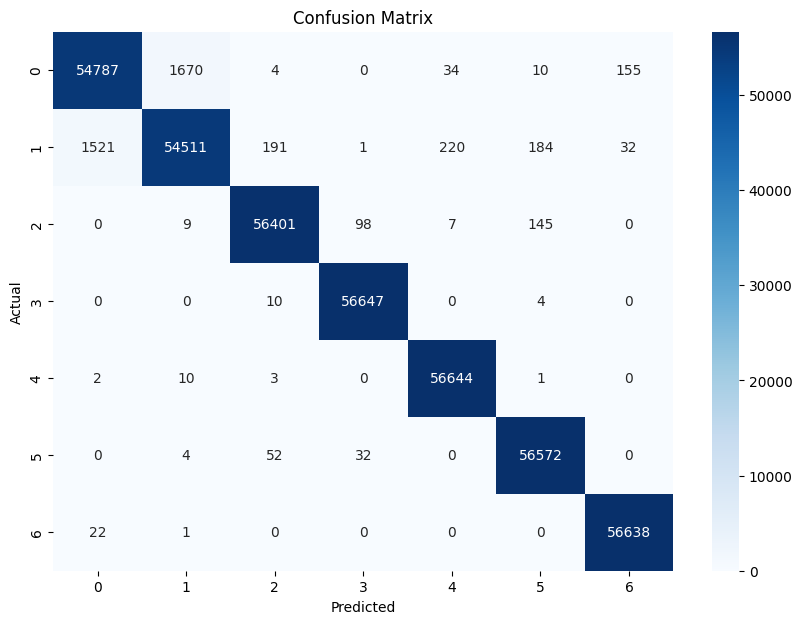


--- Top 10 Most Important Features ---
                               feature  importance
0                            Elevation    0.249451
5      Horizontal_Distance_To_Roadways    0.112782
9   Horizontal_Distance_To_Fire_Points    0.093217
3     Horizontal_Distance_To_Hydrology    0.067429
4       Vertical_Distance_To_Hydrology    0.051837
6                        Hillshade_9am    0.041671
13                    Wilderness_Area4    0.041157
1                               Aspect    0.038847
8                        Hillshade_3pm    0.034022
7                       Hillshade_Noon    0.033909


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Print the Classification Report
# This gives you precision, recall, and f1-score for each class
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


# 2. Visualize the Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# 3. Check Feature Importance (Bonus)
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print("\n--- Top 10 Most Important Features ---")
print(feature_importance_df.head(10))